### Differentiate Ham And Spam Email 
### Group 11  
#### EG/2020/3894
#### EG/2020/3901

### Load Data

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np

data = pd.read_csv("Spam_Data.csv")

In [2]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.shape

(5572, 2)

In [4]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data['Category'].value_counts() 

Category
ham     4825
spam     747
Name: count, dtype: int64

c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Category', ylabel='count'>

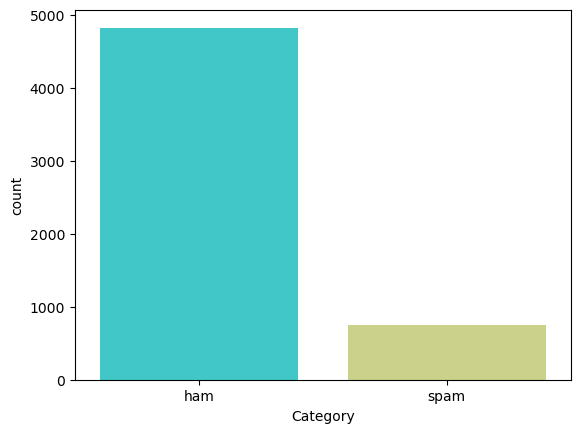

In [8]:

sns.countplot(x='Category',data=data,palette='rainbow')

In [10]:
# nltk.download('punkt')
data['num_of_characters'] = data['Message'].apply(len)
data['num_words']=data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences']=data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()




,Category,Message,num_of_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

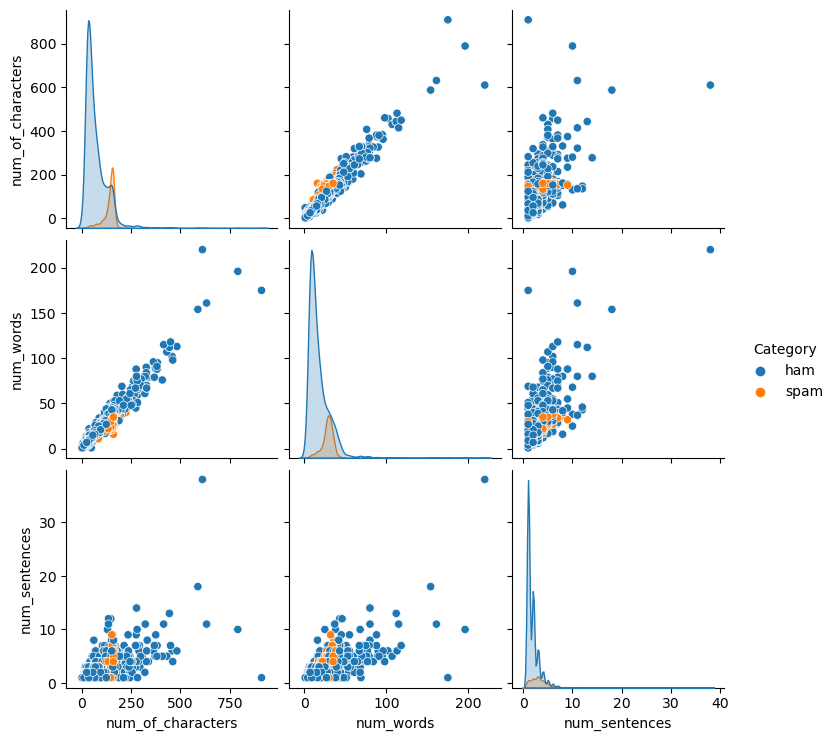

In [11]:
sns.pairplot(data,hue='Category')

## Data Preprocessing


### Data Cleaning

In [12]:
# Check if the null value exists
data["Message"].isnull().sum()

0

In [13]:
## In our data set there is no null values. But if there are null values we can replace null values with null string
data = data.where((pd.notnull(data)),'')

#### Check if there is duplicate data in the dataset. If so remove them.

In [14]:
duplicates_data = data[data.duplicated()]
duplicates_data


,Category,Message,num_of_characters,num_words,num_sentences
102,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
153,ham,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
206,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,40,6
222,ham,"Sorry, I'll call later",22,6,1
325,ham,No calls..messages..missed calls,32,7,1
...,...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,153,32,9
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,67,6
5539,ham,Just sleeping..and surfing,26,5,1
5553,ham,Hahaha..use your brain dear,27,6,1


In [15]:
## Checking number of duplicates in data
data_duplicate=data[data.duplicated(keep='first')]
data_duplicate.shape

(403, 5)

In [16]:
## Remove all duplucates , keeping first occurrence of the duplicates
data_new = data.drop_duplicates(keep='first')
data_new = data_new.drop(['num_of_characters','num_words','num_sentences'],axis=1)
data_new.shape

(5169, 2)

In [17]:
data_new.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [19]:

def preprocess_text(text):
    # Remove punctuation 
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenization - split in to words
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in set(stopwords.words('english'))]

    # Lemmatization - gramatically correct base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming - root word
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)



In [20]:

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
data_new['transformed_text']=data_new['Message'].apply(preprocess_text)
data_new.replace({'Category':{'spam':0,'ham':1}},inplace=True)
data_new.head()

,Category,Message,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [21]:
#Vocabulary
from collections import Counter
vocab = Counter()
for sentence in data_new['transformed_text']:
    vocab.update(sentence.split())

In [22]:
len(vocab)
data_new.shape

(5169, 3)

In [23]:
tokens = [key for key in vocab if vocab[key] >= 10]

In [24]:
len(tokens)

809

In [25]:
#install pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [26]:
spam_wc = wc.generate(data_new[data_new['Category']==0]['transformed_text'].str.cat(sep=" "))

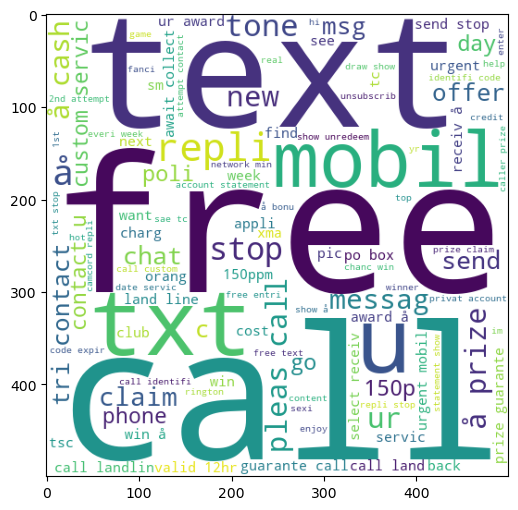

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

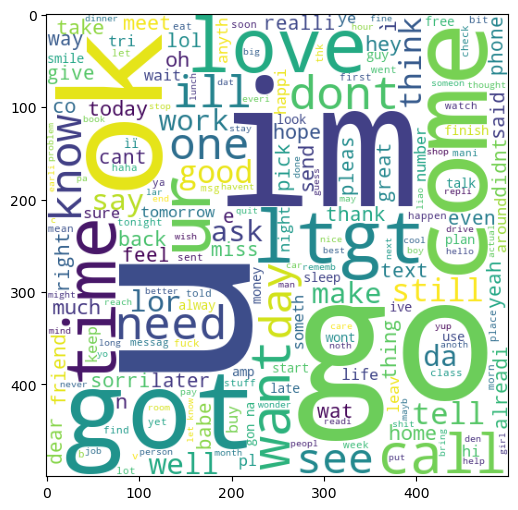

In [28]:
ham_wc = wc.generate(data_new[data_new['Category']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## Feature extraction

## Split the data into training and testing

In [29]:
from sklearn.model_selection import train_test_split
x=data_new['transformed_text']
y=data_new['Category']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
#using Vectorization to feature extraction 
def Vectorizer(ds,vocabulary):
    vectorized_list=[]
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1
        vectorized_list.append(sentence_list)
    vectorized_list_new = np.asarray(vectorized_list,dtype='float32')
    return vectorized_list_new

In [31]:
vectorized_x_train = Vectorizer(x_train,tokens)

In [32]:
vectorized_x_test = Vectorizer(x_test,tokens)

### Balance the Training Date Set

In [33]:
from imblearn.over_sampling import SMOTE

res=SMOTE(random_state=50)
x_train_res,y_train_res=res.fit_resample(vectorized_x_train,y_train)

([<matplotlib.patches.Wedge at 0x166f2a2e8d0>,
 [Text(6.735557395310444e-17, 1.1, 'ham'),
  Text(-2.0206672185931328e-16, -1.1, 'spam')])

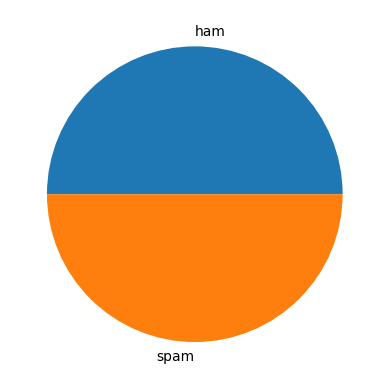

In [34]:
plt.pie(y_train_res.value_counts(),labels=['ham','spam'])


In [35]:
print(x_train_res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Train the model using Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(x_train_res,y_train_res)


LogisticRegression()

## Evaluate the model for Logistic Regression

In [37]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix


#### For training data Set

In [38]:
prediction_on_training_LR=model_LR.predict(x_train_res)

accuracy_on_training_LR=accuracy_score(y_train_res,prediction_on_training_LR)
precision_score_on_training_LR=precision_score(y_train_res,prediction_on_training_LR)
recall_score_on_training_LR=recall_score(y_train_res,prediction_on_training_LR)
f1_score_on_training_LR=f1_score(y_train_res,prediction_on_training_LR)
print("Accuracy on training data:",accuracy_on_training_LR,"\nPrecision on training data:",precision_score_on_training_LR,"\nRecall on training data:",recall_score_on_training_LR,"\nF1 Score on training data:",f1_score_on_training_LR)

Accuracy on training data: 0.9745645562620957 
Precision on training data: 0.9637935693055931 
Recall on training data: 0.9861763892728781 
F1 Score on training data: 0.9748565181743647


#### For Tesing data set

In [39]:
prediction_on_testing_LR=model_LR.predict(vectorized_x_test)

accuracy_on_testing_LR=accuracy_score(y_test,prediction_on_testing_LR)
precision_score_LR=precision_score(y_test,prediction_on_testing_LR)
recall_score_LR=recall_score(y_test,prediction_on_testing_LR)
f1_score_LR=f1_score(y_test,prediction_on_testing_LR)
print("Accuracy on Testing: ",accuracy_on_testing_LR,"\nPrecision on Testing: ",precision_score_LR,"\nRecall on Testing: ",recall_score_LR,"\nF1 Score on Testing: ",f1_score_LR)

Accuracy on Testing:  0.9661508704061895 
Precision on Testing:  0.9864864864864865 
Recall on Testing:  0.9744160177975528 
F1 Score on Testing:  0.9804141018466704


In [40]:
confusion_matrix_LR=confusion_matrix(y_test,prediction_on_testing_LR)
confusion_matrix_LR

array([[123,  12],
       [ 23, 876]], dtype=int64)

## Train the model using Naive Bayer Classifier

In [41]:
from sklearn.naive_bayes import MultinomialNB
model_NB=MultinomialNB()
model_NB.fit(x_train_res,y_train_res)

MultinomialNB()

## Evaluate the model for Naive Bayer

#### For training data Set

In [42]:
prediction_on_training_NB=model_NB.predict(x_train_res)

accuracy_on_training_NB=accuracy_score(y_train_res,prediction_on_training_NB)
precision_score_on_training_NB=precision_score(y_train_res,prediction_on_training_NB)
recall_score_on_training_NB=recall_score(y_train_res,prediction_on_training_NB)
f1_score_on_training_NB=f1_score(y_train_res,prediction_on_training_NB)
print("Accuracy on training data:",accuracy_on_training_NB,"\nPrecision on training data:",precision_score_on_training_NB,"\nRecall on training data:",recall_score_on_training_NB,"\nF1 Score on training data:",f1_score_on_training_NB)

Accuracy on training data: 0.9415261266242743 
Precision on training data: 0.9409166206515737 
Recall on training data: 0.9422173071606303 
F1 Score on training data: 0.9415665147119768


#### For testing data Set

In [43]:
prediction_on_tesing_NB=model_NB.predict(vectorized_x_test)

accuracy_on_testing_NB=accuracy_score(y_test,prediction_on_tesing_NB)
precision_score_NB=precision_score(y_test,prediction_on_tesing_NB)
recall_score_NB=recall_score(y_test,prediction_on_tesing_NB)
f1_score_NB=f1_score(y_test,prediction_on_tesing_NB)
print("Accuracy on Testing: ",accuracy_on_testing_NB,"\nPrecision on Testing: ",precision_score_NB,"\nRecall on Testing: ",recall_score_NB,"\nF1 Score on Testing: ",f1_score_NB)

Accuracy on Testing:  0.9381044487427466 
Precision on Testing:  0.9815455594002307 
Recall on Testing:  0.946607341490545 
F1 Score on Testing:  0.9637599093997736


In [44]:
confusion_matrix_on_tesing_NB=confusion_matrix(y_test,prediction_on_tesing_NB)
confusion_matrix_on_tesing_NB

array([[119,  16],
       [ 48, 851]], dtype=int64)

In [45]:
input=["START a SPOTIFY MARKETING BUSINESS in 24h"]
input_data=preprocess_text(input[0])
input_data=Vectorizer(input,tokens)


## making predintions
pred= model_LR.predict(input_data)
if pred==1:
    print("Ham")
else:
    print("Spam")

Ham


## Hyper parameters tuning for Naive Bayes

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
class_prior = [0.3,0.7]
param_grid_NB={'alpha':[0.00000001,0.0000001, 0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50],
            'force_alpha':[True,False],
            'fit_prior':[True,False],
            'class_prior':[class_prior,'None']}

In [48]:
grid_search_NB =GridSearchCV(estimator=model_NB,param_grid=param_grid_NB)
grid_search_NB.fit(x_train_res,y_train_res)

C:\Users\pathi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pathi\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pathi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\pathi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
    vali

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                   20, 25, 30, 40, 50],
                         'class_prior': [[0.3, 0.7], 'None'],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]})

In [49]:
grid_search_NB.best_params_

{'alpha': 1e-08,
 'class_prior': [0.3, 0.7],
 'fit_prior': True,
 'force_alpha': True}

In [50]:
grid_search_NB.score(vectorized_x_test,y_test)

0.9642166344294004

## Hyper parameters tuning for Logistic Regression

In [51]:
param_grid_LR={'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear'],  
    'multi_class': ['auto', 'ovr'],}

In [52]:
grid_search_LR =GridSearchCV(estimator=model_LR,param_grid=param_grid_LR)
grid_search_LR.fit(x_train_res,y_train_res)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [53]:
grid_search_LR.best_params_

{'C': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
grid_search_LR.score(vectorized_x_test,y_test)

0.941972920696325

## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
x = Vectorizer(data_new['transformed_text'],tokens)
cross_val_score_LR=cross_val_score(model_LR,x,y,cv=10).mean()
cross_val_score_LR

0.9791065029313423

In [57]:
cross_val_score_NB=cross_val_score(model_NB,x,y,cv=10).mean()
cross_val_score_NB

0.9742709129893694